# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 21 - 4to bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del jueves 2 de octubre (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar tanto los contenidos vistos en clase, como otra bibliografía externa. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 60% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/xoqxtBoFYok3542TA)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co21.ipynb**
- Los códigos deben poder ejecutarse.
- IMPORTANTE: Los resultados, cómo el código, los gráficos, los prints y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal (elegido por ustedes) con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### Desarrollo

Genero el dataset y con una función no lineal y ruido.

Uso la función seno para la no linealidad.


In [4]:
import numpy as np
import matplotlib.pyplot as plt


n = 100
ini = -3
fin = 3
x = np.linspace(ini, fin, n)

def funcion_no_lineal(x):
    return np.sin(x)

y = funcion_no_lineal(x) + np.random.randn(n) * 0.2

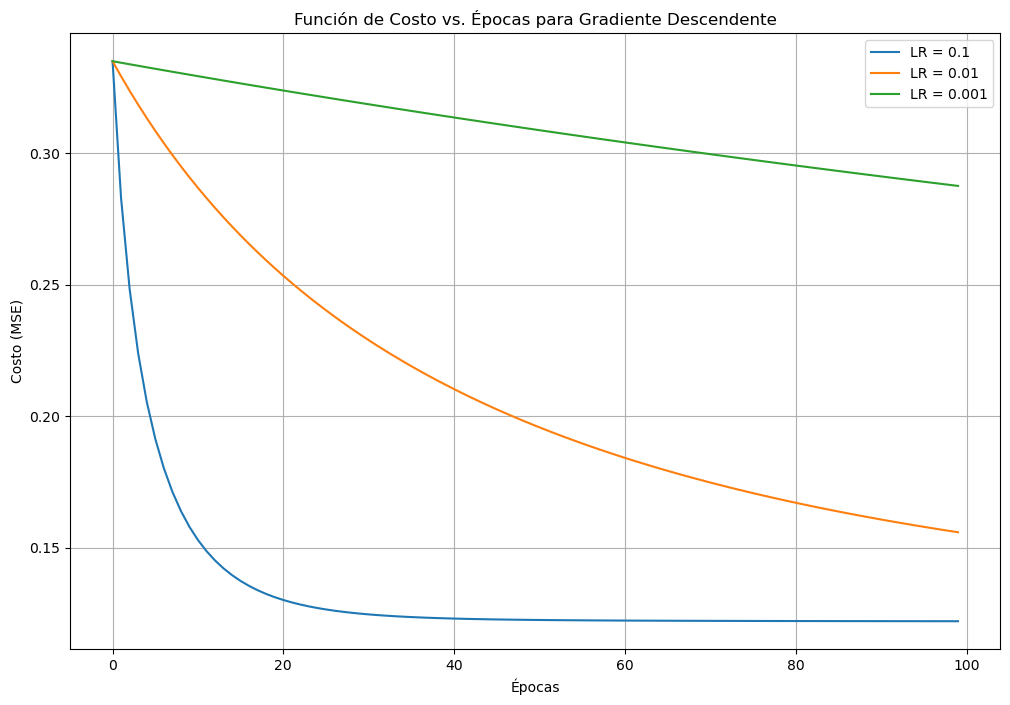

Mejor learning rate: 0.1
Costo final: 0.121997


In [5]:
# Clase GradientDescent reutilizable
class GradientDescent:
    """
    Clase para implementar el algoritmo de Gradient Descent
    """
    
    def __init__(self, x, y, learning_rates=[0.1, 0.01, 0.001], epochs=100):
        """
        Inicializa el optimizador Gradient Descent
        
        Args:
            x: datos de entrada
            y: datos objetivo
            learning_rates: lista de tasas de aprendizaje
            epochs: número de épocas
        """
        self.x = x
        self.y = y
        self.learning_rates = learning_rates
        self.epochs = epochs
        self.m = len(x)
        
        # Inicializar parámetros aleatoriamente
        self.initial_w = np.random.randn()
        self.initial_b = np.random.randn()
        
        # Almacenar resultados
        self.results = {}
        
    def process(self):
        """
        Ejecuta el algoritmo de Gradient Descent para todos los learning rates
        """
        for lr in self.learning_rates:
            w = self.initial_w
            b = self.initial_b
            cost_history = []
            
            for epoch in range(self.epochs):
                # 1. Calcular las predicciones
                z = w * self.x + b
                y_hat = np.tanh(z)
                
                # 2. Calcular las derivadas
                error = y_hat - self.y
                
                # Derivada de tanh(z) = 1 - tanh^2(z) = 1 - y_hat^2
                dw = (2 / self.m) * np.sum(error * (1 - y_hat**2) * self.x)
                db = (2 / self.m) * np.sum(error * (1 - y_hat**2))
                
                # 3. Actualizar los parámetros
                w = w - lr * dw
                b = b - lr * db
                
                # 4. Calcular y guardar el costo
                cost = (1 / self.m) * np.sum(error**2)
                cost_history.append(cost)
            
            # Guardar resultados para este learning rate
            self.results[lr] = {
                'cost_history': cost_history,
                'final_w': w,
                'final_b': b,
                'final_cost': cost_history[-1]
            }
    
    def plot(self, title="Gradient Descent", figsize=(12, 8)):
        """
        Grafica los resultados del entrenamiento
        
        Args:
            title: título del gráfico
            figsize: tamaño de la figura
        """
        plt.figure(figsize=figsize)
        
        for lr in self.learning_rates:
            if lr in self.results:
                plt.plot(self.results[lr]['cost_history'], label=f'LR = {lr}')
        
        plt.title(title)
        plt.xlabel('Épocas')
        plt.ylabel('Costo (MSE)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def get_best_result(self):
        """
        Retorna el mejor resultado (menor costo final)
        """
        best_lr = min(self.results.keys(), key=lambda lr: self.results[lr]['final_cost'])
        return best_lr, self.results[best_lr]

# Crear instancia y ejecutar
gd = GradientDescent(x, y, learning_rates=[0.1, 0.01, 0.001], epochs=100)
gd.process()
gd.plot("Función de Costo vs. Épocas para Gradiente Descendente")

# Mostrar el mejor resultado
best_lr, best_result = gd.get_best_result()
print(f"Mejor learning rate: {best_lr}")
print(f"Costo final: {best_result['final_cost']:.6f}")


### Conslusión
Una tasa de aprendizaje de LR = 0.1 es la más efectiva para este problema y en el rango de 100 épocas. Logró la convergencia más rápida y alcanzó el costo más bajo. Por otro lado, un LR de 0.01 es funcional pero lento, y un LR de 0.001 es ineficaz para la cantidad de épocas asignadas.

El gráfico demuestra que la elección del learning rate es un hiperparámetro crítico que afecta directamente la velocidad y la eficacia con la que el Gradiente Descendente encuentra el mínimo de una función de costo.

### 1b) Implementación de Adam (1 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch (batch size a elección de ustedes).

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

=== ADAM FULL BATCH ===


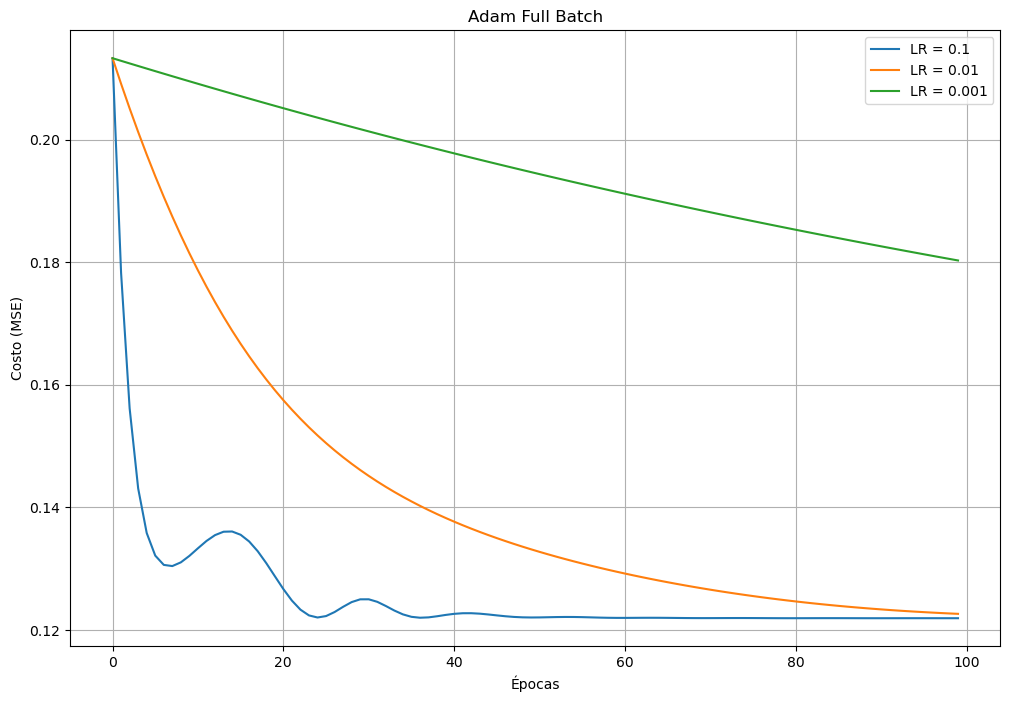

=== ADAM MINI-BATCH ===


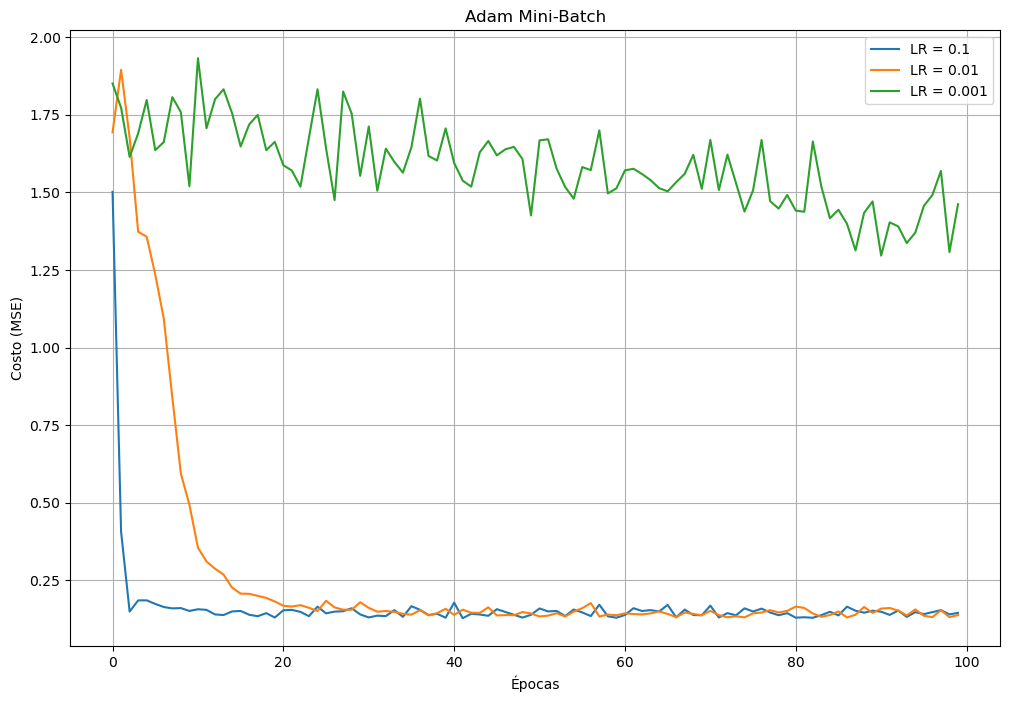


Mejor Adam Full Batch - LR: 0.1, Costo: 0.121907
Mejor Adam Mini-Batch - LR: 0.01, Costo: 0.137538


In [7]:
# Clase Adam reutilizable
class Adam:
    """
    Clase para implementar el algoritmo de Adam
    """
    
    def __init__(self, x, y, learning_rates=[0.1, 0.01, 0.001], epochs=100, 
                 beta1=0.9, beta2=0.999, epsilon=1e-8, batch_size=None):
        """
        Inicializa el optimizador Adam
        
        Args:
            x: datos de entrada
            y: datos objetivo
            learning_rates: lista de tasas de aprendizaje
            epochs: número de épocas
            beta1: decay del primer momento
            beta2: decay del segundo momento
            epsilon: estabilidad numérica
            batch_size: tamaño del batch (None para full batch)
        """
        self.x = x
        self.y = y
        self.learning_rates = learning_rates
        self.epochs = epochs
        self.m = len(x)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.batch_size = batch_size if batch_size else self.m
        
        # Inicializar parámetros aleatoriamente
        self.initial_w = np.random.randn()
        self.initial_b = np.random.randn()
        
        # Almacenar resultados
        self.results = {}
        
    def process(self):
        """
        Ejecuta el algoritmo de Adam para todos los learning rates
        """
        for lr in self.learning_rates:
            w = self.initial_w
            b = self.initial_b
            m_w, v_w = 0, 0
            m_b, v_b = 0, 0
            cost_history = []
            
            for epoch in range(1, self.epochs + 1):
                if self.batch_size < self.m:  # Mini-batch
                    # Barajar datos
                    indices = np.arange(self.m)
                    np.random.shuffle(indices)
                    x_shuffled = self.x[indices]
                    y_shuffled = self.y[indices]
                    
                    epoch_cost = 0
                    t = 0
                    
                    for i in range(0, self.m, self.batch_size):
                        x_batch = x_shuffled[i:i + self.batch_size]
                        y_batch = y_shuffled[i:i + self.batch_size]
                        batch_m = len(x_batch)
                        
                        # Forward pass
                        z = w * x_batch + b
                        y_hat = np.tanh(z)
                        error = y_hat - y_batch
                        
                        # Gradientes
                        dw = (2 / batch_m) * np.sum(error * (1 - y_hat**2) * x_batch)
                        db = (2 / batch_m) * np.sum(error * (1 - y_hat**2))
                        
                        # Acumular costo
                        batch_cost = (1 / batch_m) * np.sum(error**2)
                        epoch_cost += batch_cost
                        
                        # Actualizar momentos
                        m_w = self.beta1 * m_w + (1 - self.beta1) * dw
                        v_w = self.beta2 * v_w + (1 - self.beta2) * (dw**2)
                        m_b = self.beta1 * m_b + (1 - self.beta1) * db
                        v_b = self.beta2 * v_b + (1 - self.beta2) * (db**2)
                        
                        # Corrección de sesgo
                        t += 1
                        m_w_hat = m_w / (1 - self.beta1**t)
                        v_w_hat = v_w / (1 - self.beta2**t)
                        m_b_hat = m_b / (1 - self.beta1**t)
                        v_b_hat = v_b / (1 - self.beta2**t)
                        
                        # Actualizar parámetros
                        w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                        b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)
                    
                    cost_history.append(epoch_cost / (self.m // self.batch_size))
                    
                else:  # Full batch
                    # Forward pass
                    z = w * self.x + b
                    y_hat = np.tanh(z)
                    error = y_hat - self.y
                    
                    # Gradientes
                    dw = (2 / self.m) * np.sum(error * (1 - y_hat**2) * self.x)
                    db = (2 / self.m) * np.sum(error * (1 - y_hat**2))
                    
                    # Actualizar momentos
                    m_w = self.beta1 * m_w + (1 - self.beta1) * dw
                    v_w = self.beta2 * v_w + (1 - self.beta2) * (dw**2)
                    m_b = self.beta1 * m_b + (1 - self.beta1) * db
                    v_b = self.beta2 * v_b + (1 - self.beta2) * (db**2)
                    
                    # Corrección de sesgo
                    m_w_hat = m_w / (1 - self.beta1**epoch)
                    v_w_hat = v_w / (1 - self.beta2**epoch)
                    m_b_hat = m_b / (1 - self.beta1**epoch)
                    v_b_hat = v_b / (1 - self.beta2**epoch)
                    
                    # Actualizar parámetros
                    w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                    b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)
                    
                    # Calcular costo
                    cost = (1 / self.m) * np.sum(error**2)
                    cost_history.append(cost)
            
            # Guardar resultados
            self.results[lr] = {
                'cost_history': cost_history,
                'final_w': w,
                'final_b': b,
                'final_cost': cost_history[-1]
            }
    
    def plot(self, title="Adam", figsize=(12, 8)):
        """
        Grafica los resultados del entrenamiento
        """
        plt.figure(figsize=figsize)
        
        for lr in self.learning_rates:
            if lr in self.results:
                plt.plot(self.results[lr]['cost_history'], label=f'LR = {lr}')
        
        plt.title(title)
        plt.xlabel('Épocas')
        plt.ylabel('Costo (MSE)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def get_best_result(self):
        """
        Retorna el mejor resultado (menor costo final)
        """
        best_lr = min(self.results.keys(), key=lambda lr: self.results[lr]['final_cost'])
        return best_lr, self.results[best_lr]

# Crear instancias y ejecutar
print("=== ADAM FULL BATCH ===")
adam_fb = Adam(x, y, learning_rates=[0.1, 0.01, 0.001], epochs=100, batch_size=len(x))
adam_fb.process()
adam_fb.plot("Adam Full Batch")

print("=== ADAM MINI-BATCH ===")
adam_mb = Adam(x, y, learning_rates=[0.1, 0.01, 0.001], epochs=100, batch_size=16)
adam_mb.process()
adam_mb.plot("Adam Mini-Batch")

# Mostrar mejores resultados
best_lr_fb, best_result_fb = adam_fb.get_best_result()
best_lr_mb, best_result_mb = adam_mb.get_best_result()

print(f"\nMejor Adam Full Batch - LR: {best_lr_fb}, Costo: {best_result_fb['final_cost']:.6f}")
print(f"Mejor Adam Mini-Batch - LR: {best_lr_mb}, Costo: {best_result_mb['final_cost']:.6f}")


### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

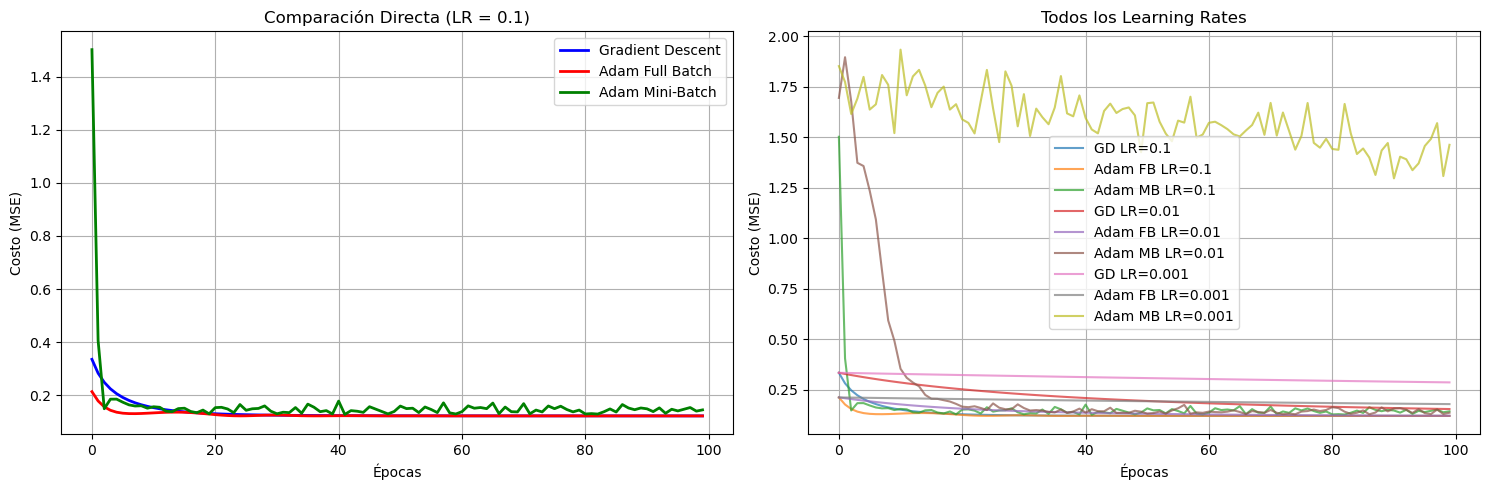

=== ANÁLISIS COMPARATIVO ===
GD (LR=0.1): 0.121997
Adam FB (LR=0.1): 0.121907
Adam MB (LR=0.1): 0.144612


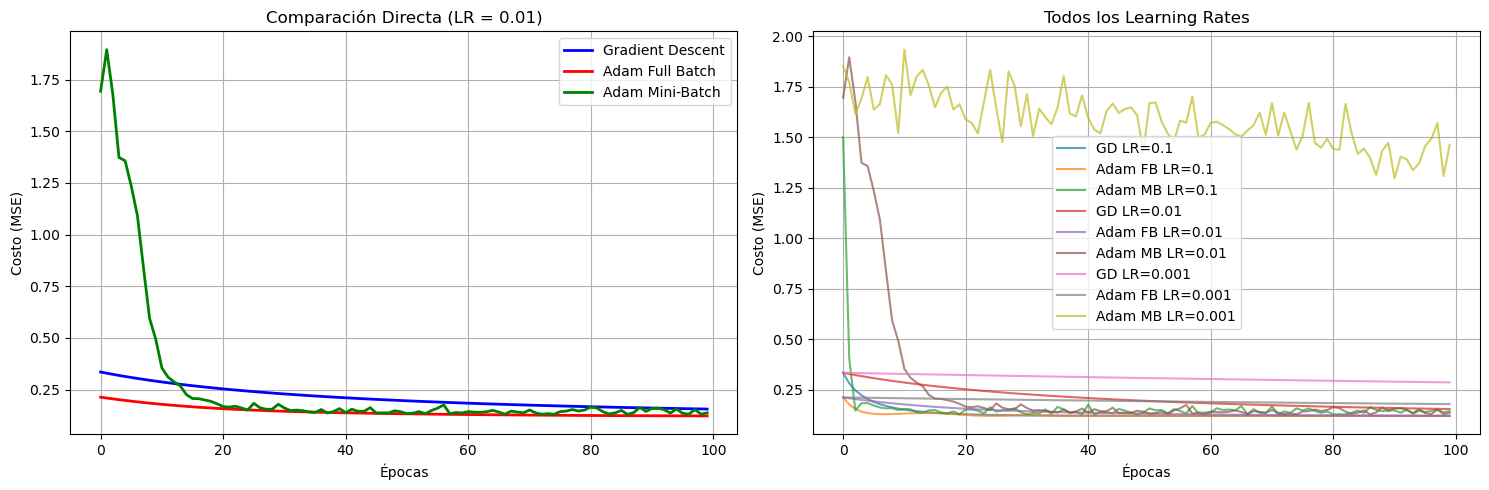

=== ANÁLISIS COMPARATIVO ===
GD (LR=0.01): 0.155861
Adam FB (LR=0.01): 0.122622
Adam MB (LR=0.01): 0.137538


In [11]:
# Comparación directa usando las clases
def compare_optimizers(gd, adam_fb, adam_mb, best_lr=0.1):
    """
    Compara los tres optimizadores usando el mejor learning rate
    """
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Comparación individual
    plt.subplot(1, 2, 1)
    if best_lr in gd.results:
        plt.plot(gd.results[best_lr]['cost_history'], label='Gradient Descent', color='blue', linewidth=2)
    if best_lr in adam_fb.results:
        plt.plot(adam_fb.results[best_lr]['cost_history'], label='Adam Full Batch', color='red', linewidth=2)
    if best_lr in adam_mb.results:
        plt.plot(adam_mb.results[best_lr]['cost_history'], label='Adam Mini-Batch', color='green', linewidth=2)
    
    plt.title(f'Comparación Directa (LR = {best_lr})')
    plt.xlabel('Épocas')
    plt.ylabel('Costo (MSE)')
    plt.legend()
    plt.grid(True)
    
    # Subplot 2: Comparación de todos los learning rates
    plt.subplot(1, 2, 2)
    for lr in [0.1, 0.01, 0.001]:
        if lr in gd.results:
            plt.plot(gd.results[lr]['cost_history'], label=f'GD LR={lr}', alpha=0.7)
        if lr in adam_fb.results:
            plt.plot(adam_fb.results[lr]['cost_history'], label=f'Adam FB LR={lr}', alpha=0.7)
        if lr in adam_mb.results:
            plt.plot(adam_mb.results[lr]['cost_history'], label=f'Adam MB LR={lr}', alpha=0.7)
    
    plt.title('Todos los Learning Rates')
    plt.xlabel('Épocas')
    plt.ylabel('Costo (MSE)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis cuantitativo
    print("=== ANÁLISIS COMPARATIVO ===")
    if best_lr in gd.results:
        print(f"GD (LR={best_lr}): {gd.results[best_lr]['final_cost']:.6f}")
    if best_lr in adam_fb.results:
        print(f"Adam FB (LR={best_lr}): {adam_fb.results[best_lr]['final_cost']:.6f}")
    if best_lr in adam_mb.results:
        print(f"Adam MB (LR={best_lr}): {adam_mb.results[best_lr]['final_cost']:.6f}")

# Ejecutar comparación
compare_optimizers(gd, adam_fb, adam_mb, best_lr=0.1)
compare_optimizers(gd, adam_fb, adam_mb, best_lr=0.01)


conclusión de las comparaciones

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1LOzaL3dgnX4sWSPm49d0YQKeVfCmx3Hq/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones, compuestas por un cliente y el producto que adquirió.


### 2a) EDA y preparación del dataset (2.5 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar y transformar las variables que sean necesarias, analizar qué columnas se deben dropear, cuáles vale la pena hacer un tratamiento de valores nulos, si se debe usar label encoding, one-hot encoding, ordinal encoding o mapping encoding, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a un segmento: "Casual" (gasta menos de 3000), "Gama media" (gasta entre 3000 y 8000), "Gama alta" (gasta entre 8000 y 18000) o a "Premium" (gasta más de 18000), según el producto que adquirió.

Redactar las conclusiones preliminares que pueden notar de cada feature y justificar el porqué de cada encoding aplicado.

**IMPORTANTE: Luego de asignar los segmentos, no se olviden de eliminar la columna "Purchase".**

### 2b) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 78% de accuracy y f1 score para el set de validation.

### 2c) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Justificar la cantidad de dimensiones usada para los embeddings. **Comparar contra el modelo sin embeddings** y explicar el porqué de los resultados.

Elegir la cantidad justa y necesaria de dimensiones para los embeddings y justificar el porqué.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 90% de accuracy y f1 score para el set de validation.

### 2d) Encontrar usuarios similares (1 punto)
Para el modelo del punto 2c) implementar una función que reciba un ID de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar. También se debe mostrar el grado o porcentaje de similitud de cada usuario que retorne la función.